In [1]:
import numpy as np

# Estatística

In [2]:
lista = np.random.randint(0, 10, 5)
lista

array([7, 6, 8, 5, 3])

In [3]:
np.mean(lista)

5.8

In [4]:
np.median(lista)

6.0

In [5]:
lista = np.append(lista, 100)
lista

array([  7,   6,   8,   5,   3, 100])

In [6]:
np.mean(lista)

21.5

In [7]:
np.median(lista)

6.5

## Histogramas sobrepostos

In [8]:
import matplotlib.pyplot as plt

In [9]:
lista_rand = np.random.randint(0, 100, 100)

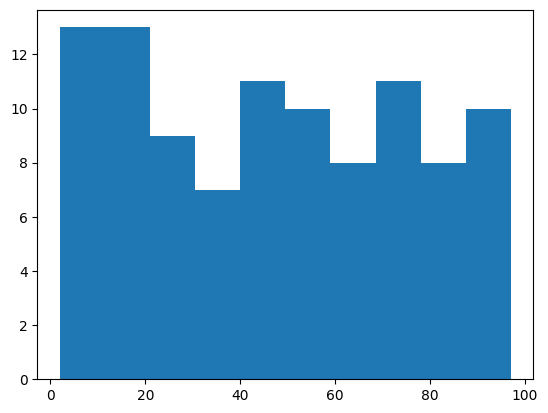

In [10]:
plt.hist(lista_rand);

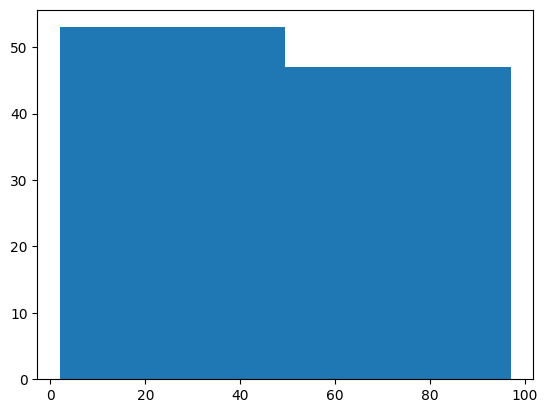

In [11]:
plt.hist(lista_rand, bins=2);

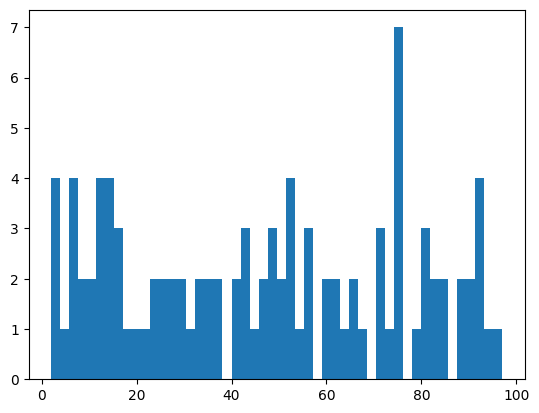

In [12]:
plt.hist(lista_rand, bins=50);

#### kde (kernel density estimator), busca estimar uma f.d.p. (função densidade de probabilidade) da variável numérica

In [13]:
import seaborn as sns

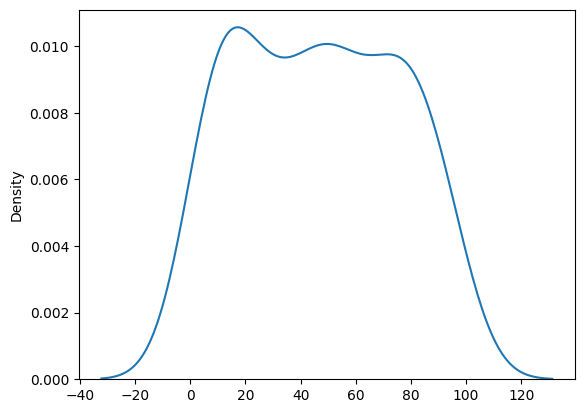

In [14]:
sns.kdeplot(lista_rand);

## Covariância
variância, é uma medida de dispersão que informa o quão distante cada valor desse conjunto está do valor central (médio). Caso desejemos medir a variação entre duas variáveis numéricas, podemos utilizar a covariância amostral

In [15]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [16]:
df[['total_bill', 'tip']].cov()

,total_bill,tip
total_bill,79.252939,8.323502
tip,8.323502,1.914455


O método .cov() do pandas informa a matriz de variância-covariância, indicando que a variância de total_bill e tip são 79,25 e 1,91, respectivamente, e a covariância entre elas é de 8,32.

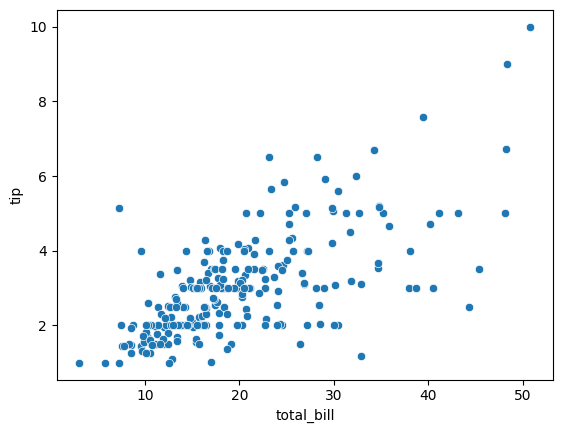

In [17]:
sns.scatterplot(data=df, x="total_bill", y="tip");

A correlação normaliza a covariância para representar a relação entre 2 variáveis como um número que varia entre -1 e 1.

In [18]:
df[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


## Associações não lineares
a relação entre duas variáveis pode ser monotônica, ou seja, as variáveis tendem a mudar juntas, mas não necessariamente a uma taxa constante <br>
o <b>coeficiente de Spearman</b> não requer que a relação entre as variáveis seja linear. Inclusive, não requer que a variável seja contínua. Ou seja, podemos utilizá-lo para variáveis com medidas ordinais

In [19]:
df[['total_bill', 'tip', 'size']].corr(method='spearman')

,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


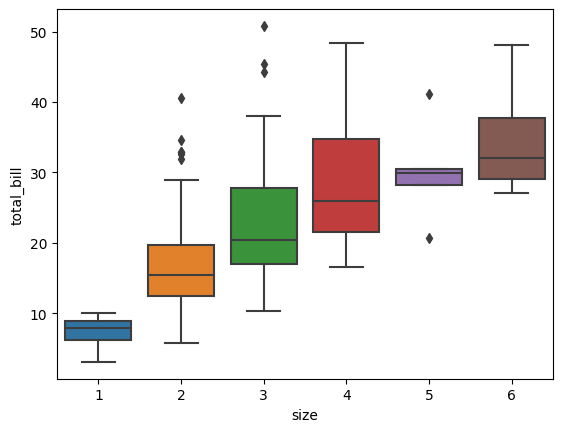

In [20]:
sns.boxplot(data=df, x="size", y="total_bill");

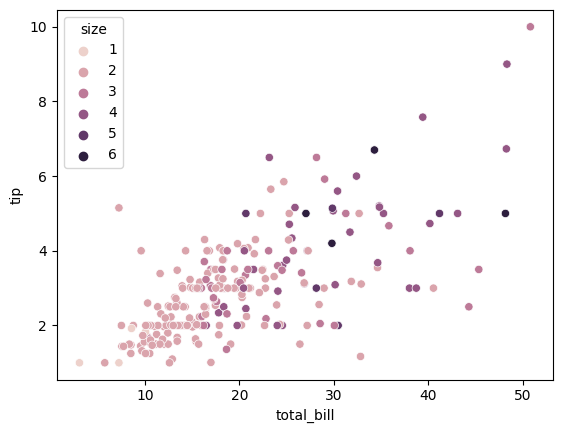

In [21]:
sns.scatterplot(data=df, x="total_bill", y="tip", hue="size");

## Masterclass

In [22]:
total_bill_mean = df.total_bill.mean()
total_bill_median = df.total_bill.median()
total_bill_mode = df.total_bill.mode()

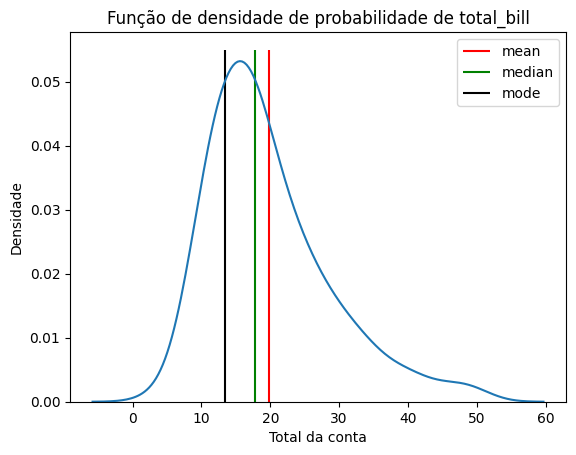

In [23]:
plt.title("Função de densidade de probabilidade de total_bill")
plt.vlines(total_bill_mean, 0, 0.055, label="mean", colors="red")
plt.vlines(total_bill_median, 0, 0.055, label="median", colors="green")
plt.vlines(total_bill_mode, 0, 0.055, label="mode", colors="black")
sns.kdeplot(data=df, x ='total_bill')
plt.xlabel("Total da conta")
plt.ylabel("Densidade")
plt.legend();

In [24]:
# parei em 17 min https://study.ultima.school/resource/lesson-6489dc164b1ca3f36e62efa6